In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sys
import import_ipynb

In [12]:
sys.path.insert(0, r'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research')
from NoiseGenerieren import DatenGenerieren, vsTimePloten, PredvsPrey, Data_preperation

In [13]:
Störung=1
Umdrehungen=10
ProzentderDaten=1
Prey_train, Predator_train, Prey_test, Predator_test = DatenGenerieren(Störung, Umdrehungen, ProzentderDaten)

In [14]:
def Bagging(Störung, Umdrehungen, ProzentderDaten,target_depth):
    Prey_train, Predator_train, Prey_test, Predator_test = DatenGenerieren(Störung, Umdrehungen, ProzentderDaten)
    X_train, y_train_prey, y_train_predator = Data_preperation(Prey_train, Predator_train)
    X_test, y_test_prey, y_test_predator = Data_preperation(Prey_test, Predator_test)
    
    
    Best_prey=[]
    for depth in range(1,target_depth):
        bag_clf = BaggingRegressor(estimator=DecisionTreeRegressor(criterion="squared_error", # simple base classifier
                                                                 max_depth=depth),
                            n_estimators=100)
        bag_clf.fit(X_train, y_train_prey.values.ravel())
        y_bag_prey = bag_clf.predict(X_test)
        Best_prey.append(( mean_squared_error(y_bag_prey,y_test_prey)))
    

    #print("\n Error for depth", depth,":", np.round( mean_squared_error(y_bag_prey,y_test_prey),4))
    ## "Best" model
    bag_clf = BaggingRegressor(estimator=DecisionTreeRegressor(criterion="squared_error", # simple base classifier
                                                                     max_depth=(np.argmin(Best_prey)+1)),
                                n_estimators=100)
    bag_clf.fit(X_train, y_train_prey.values.ravel())
    y_bag_prey = bag_clf.predict(X_test)
    
    Best_predator=[]
    for depth in range(1,target_depth):
        bag_clf = BaggingRegressor(estimator=DecisionTreeRegressor(criterion="squared_error", # simple base classifier
                                                                 max_depth=depth),
                            n_estimators=100)
        bag_clf.fit(X_train, y_train_predator.values.ravel())
        y_bag_predator = bag_clf.predict(X_test)
        Best_predator.append(( mean_squared_error(y_bag_predator,y_test_predator)))
    
    ## "Best" model
    bag_clf = BaggingRegressor(estimator=DecisionTreeRegressor(criterion="squared_error", # simple base classifier
                                                                 max_depth=(np.argmin(Best_predator)+1)),
                            n_estimators=100)
    bag_clf.fit(X_train, y_train_predator.values.ravel())
    y_bag_predator = bag_clf.predict(X_test)
    
    
    print(f"Für {(np.argmin(Best_prey)+1)} gilt" )
    plt.scatter(y_test_predator, y_test_prey, label="Test Data")
    plt.scatter(y_bag_predator, y_bag_prey,label="Best Prediction Bagging", color = "orange")

    plt.xlabel("Predator")
    plt.ylabel("Prey")
    plt.title("Tree prediction with error "+"Error Predator"+str(np.round(mean_squared_error(y_bag_predator,y_test_predator),5))+"Error Prey"+str(np.round(mean_squared_error(y_bag_prey,y_test_predator),5)))
    plt.legend()
    plt.show()

Für 8 gilt


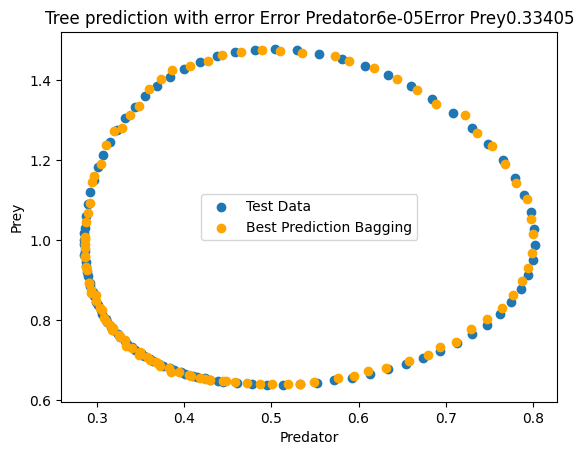

Für 7 gilt


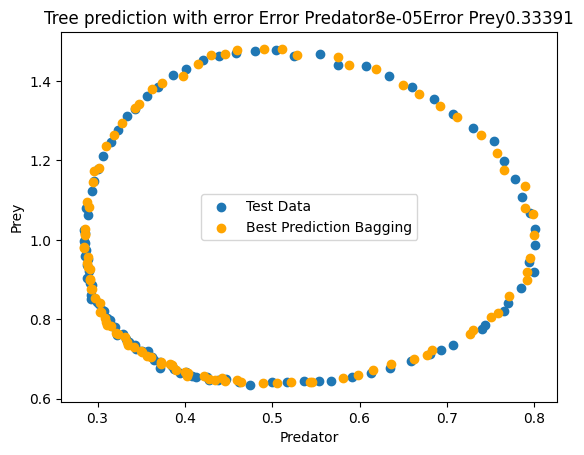

Für 7 gilt


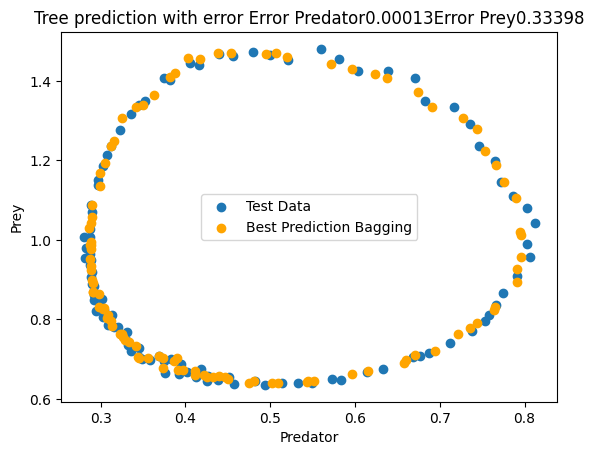

Für 9 gilt


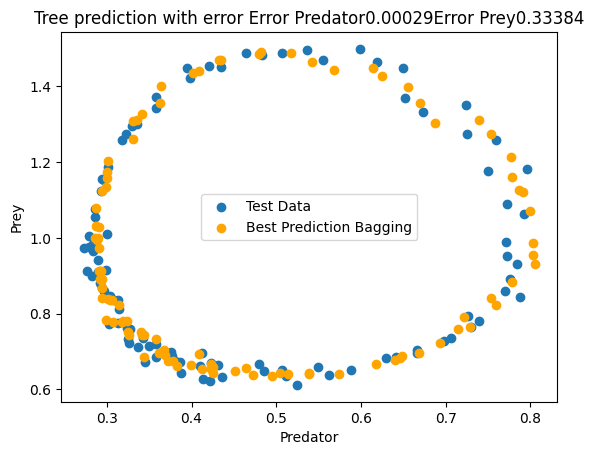

Für 5 gilt


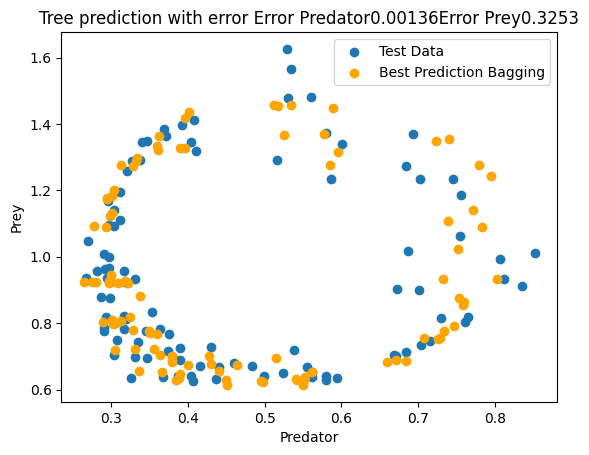

In [15]:

def apply_function_to_list(my_list):
    for element in my_list:
        Bagging(element,2,100,12)

# Testen Sie die Funktionen
my_list = [0, 0.5, 1, 2, 5]
apply_function_to_list(my_list)
